<a href="https://colab.research.google.com/github/LorenzoMauri/Advanced-Machine-Learning/blob/main/Copy_of_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from shutil import copyfile
import tarfile
from skimage import transform

In [3]:
copyfile('/content/drive/MyDrive/indoorCVPR_09/dataset_new.tar', 'dataset_new.tar')
tar = tarfile.open('dataset_new.tar')
tar.extractall()
tar.close()

In [7]:
def trainModel(model,training,test,
               epochs=12,
               loss_func = keras.optimizers.Adam()):
  
  model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=loss_func,
            metrics=['accuracy'])

  # training
  modello = model.fit(x = training, validation_data = test, epochs = epochs,batch_size = 128)
  
  return modello

def plotPerformance(modello):
  fig = plt.figure(figsize = [8,5])
  plt.subplot(1, 2, 1)
  plt.title('accuracy')
  plt.plot(modello.history['accuracy'],label='training',marker='.')
  plt.plot(modello.history['val_accuracy'],label='validation',marker='.')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.title('loss')
  plt.plot(modello.history['loss'],label='training',marker='.')
  plt.plot(modello.history['val_loss'],label='validation',marker='.')
  plt.legend()
    
  plt.show()

def buildModel(model_type,
               input_shape = (224,224,3),units_final_layer=4):
  if model_type == 'mobilenet' : 
    base_model = mobilenet_v2.MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False, pooling='avg')
  else :  base_model = VGG16(input_shape=input_shape, weights='imagenet', include_top=False)
    
    
  # blocco i layer pre-allenati in modo tale che durante le epoch rimangano fissi
  for layer in base_model.layers:
      layer.trainable = False

  # parte finale del modello di base
  x = base_model.output
  x = Flatten()(x)
  x = Dense(10, activation='relu', name='fullyConnected_0')(x)
  x = Dropout(0.5)(x)
  
  x = Dense(10, activation='relu', name='fullyConnected_1')(x)
  x = Dense(units_final_layer, activation='softmax', name='predictions')(x)

  # Modello
  model = Model(inputs=base_model.input, outputs=x)
  return model

In [17]:
def DataLoader(preprocessing_function,dataAugmentation=False,base_path='/content/dataset_new/'):
 
  # decido se fare data augmentation o meno  
  if dataAugmentation == False : 
    train_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocessing_function                                                              
                                                                 )
    
    test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocessing_function
                                                               )
  else : 
    train_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocessing_function ,                                  
                                      zoom_range=0.6
                                      )
    
    test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocessing_function,
                                     zoom_range=0.6                                 
                                      )
  
  # importo i dati 
  training = train_datagen.flow_from_directory(directory=base_path+ 'training',
                                                  target_size=(224, 224),
                                                  color_mode="rgb",
                                                  batch_size=128,
                                                  class_mode="categorical",
                                                  shuffle=True,
                                                  seed=1)

   
  test = test_datagen.flow_from_directory(directory=base_path+'test',
                                             target_size=(224, 224),
                                             color_mode="rgb",
                                             batch_size=128,
                                             class_mode="categorical",
                                             shuffle=True,
                                             seed = 1 )
  return training,test

# Dataset indoorCVPR_09 




---



In [10]:
from tensorflow.keras.applications import mobilenet_v2
model_built = buildModel(model_type='mobilenet',units_final_layer=4)


9412608/9406464 [==============================] - 0s 0us/step


In [11]:
model_built.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [18]:
training,test = DataLoader(preprocessing_function = mobilenet_v2.preprocess_input)

Found 4282 images belonging to 4 classes.
Found 920 images belonging to 4 classes.


In [19]:
model_trained_mobnet= trainModel(model_built,training,test)

Epoch 1/12
34/34 [==============================] - 21s 340ms/step - loss: 1.4139 - accuracy: 0.2700 - val_loss: 1.2994 - val_accuracy: 0.4033
Epoch 2/12
34/34 [==============================] - 10s 298ms/step - loss: 1.3039 - accuracy: 0.3268 - val_loss: 1.1825 - val_accuracy: 0.4685
Epoch 3/12
34/34 [==============================] - 10s 300ms/step - loss: 1.2171 - accuracy: 0.3753 - val_loss: 1.0927 - val_accuracy: 0.5315
Epoch 4/12
34/34 [==============================] - 10s 301ms/step - loss: 1.1513 - accuracy: 0.4023 - val_loss: 1.0250 - val_accuracy: 0.5728
Epoch 5/12
34/34 [==============================] - 10s 303ms/step - loss: 1.1221 - accuracy: 0.4483 - val_loss: 0.9694 - val_accuracy: 0.6065
Epoch 6/12
34/34 [==============================] - 10s 299ms/step - loss: 1.0725 - accuracy: 0.4581 - val_loss: 0.9284 - val_accuracy: 0.6120
Epoch 7/12
34/34 [==============================] - 10s 299ms/step - loss: 1.0439 - accuracy: 0.4901 - val_loss: 0.9172 - val_accuracy: 0.6033

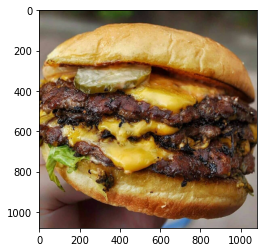

In [20]:
im = plt.imread('/content/prova0.jpg')
plt.imshow(im)

In [23]:
model.predict(im)

NameError: ignored



---


## Test zone 



---



In [ ]:
os.chdir('/content/dataset/test')
for i in os.listdir():
  if i.endswith(('png','jpg','PNG','JPG')):
    os.remove('/content/dataset/test/'+ i)
